# Zadania Lista 2

**Wymagania**

- Jupyter'a  należy uruchomić korzystając ze środowiska w kontenerze Docker, w przeciwnym razie przyznane będzie 0pkt za listę. (To wymaganie zostanie z nami do końca kursu.)

#### 1. (5 pkt) Wykonaj podzadania zdefiniowane w punktach a), b) i c) z wykorzystaniem bibliotek `numpy` i `matplotlib`

a) **(2.5 pkt)** Poniżej przedstawiono implementację funkcji `calculate`, w której zrealizowano zbiór operacji na dwóch dwuwymiarowych macierzach $a$ i $b$. Zmień implementację tej funkcji tak, aby pozbyć się wykorzystania pętli - w tym celu wykorzystaj operacje zdefiniowane w bibliotece `numpy`. Zweryfikuj poprawność nowo zdefiowanej funkcji dla dowolnie wybranego zestawu parametrów

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [13]:
def calculate(
    a: np.ndarray, 
    b: np.ndarray,
    threshold: int = 5
) -> float:
    # Check a and b dimensions
    assert a.shape == b.shape
    # Check whether array is 2D 
    assert len(a.shape) == 2

    rows = a.shape[0]
    cols = a.shape[1]
    b_sum = 0
    out = 0.0
    c = np.zeros(a.shape)

    for row_id in range(rows):
        for col_id in range(cols):
            if a[row_id][col_id] > threshold:
                c[row_id][col_id] = abs(
                    a[row_id][col_id] - b[row_id][col_id]
                )
            else:
                c[row_id][col_id] = 1

            b_sum += b[row_id][col_id]


    row_avgs = []
    for row_id in range(rows):
        row_sum = 0
        for col_id in range(cols):
            row_sum += c[row_id][col_id]

        row_avg = row_sum / cols
        out += (row_avg * 100) / b_sum  

    return out, c, b_sum

In [14]:
def calculate_2(
    a: np.ndarray, 
    b: np.ndarray,
    threshold: int = 5
) -> float:
    assert a.shape == b.shape
    assert len(a.shape) == 2

    rows = a.shape[0]
    cols = a.shape[1]
    b_sum = 0
    out = 0.0
    c = np.zeros(a.shape)

    index = a > threshold
    c[index] = abs(a[index]-b[index])
    c[a <= threshold] = 1
    
    b_sum = b.sum()
    out = (100*c.mean(axis=1)).sum()/b_sum

    return out, c, b_sum



In [15]:
a = np.random.rand(3,3)*10
b= np.random.rand(3,3)*10

o1, c1, b1 = calculate_2(a,b)
o2, c2, b2 = calculate(a,b)

print(f"output comparison: {math.isclose(o1, o2)}")
print(f"matrix comparison: \n{c1 == c2}")
print(f"b_sum comparison: {math.isclose(b1, b2)}")

output comparison: True
matrix comparison: 
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
b_sum comparison: True


b) **(1 pkt)** Dokonaj porównania czasów wykonania funkcji `calculate` i tej zaimplementowanej w punkcie 1. Wylosuj macierze wejściowe $a$ i $b$ z rozkładu dyskretnego jednostajnego z zakresu 0-10 oraz przyjmij wartość parametru `threshold` na 5. Obliczenia przeprowadź dla następujących wymiarów macierzy:

- 3x3
- 100x100
- 1000x1000
- 10000x1000

**Uwaga**
W celu mierzenia czasu można użyć komendy %timeit
https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit


In [16]:
A = []
B = []
A.append(np.random.rand(3,3)*10)
B.append(np.random.rand(3,3)*10)

A.append(np.random.rand(100,100)*10)
B.append(np.random.rand(100,100)*10)

A.append(np.random.rand(500,500)*10)
B.append(np.random.rand(500,500)*10)

A.append(np.random.rand(1000,1000)*10)
B.append(np.random.rand(1000,1000)*10)

A.append(np.random.rand(5000,1000)*10)
B.append(np.random.rand(5000,1000)*10)

A.append(np.random.rand(10000,1000)*10)
B.append(np.random.rand(10000,1000)*10)

time_old = []
time_new = []
for i in range(6):
    t = %timeit -t -r 1 -n 1 -o calculate(A[i],B[i])
    time_old.append(t.timings)
    t = %timeit -t -r 1 -n 1 -o calculate_2(A[i],B[i])
    time_new.append(t.timings)

41 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
85.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
12.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
478 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
245 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
932 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
24.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
129 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.41 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
254 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


c) **(1.5 pkt)** Wykorzystując bibliotekę `matplotlib` narysuj wykres przyśpieszenia nowo zaimplementowanej funkcji w porównaniu do oryginalnej implementacji. Dobierz odpowiedni typ wykresu, podpisz etykiety osi i uzupełnij tytuł wykresu.

[-4.387131457700037, -1.9183978244647375, -0.6110010887492275, -0.030458489759537587, 0.6810719058215119, 0.9733848571506949]


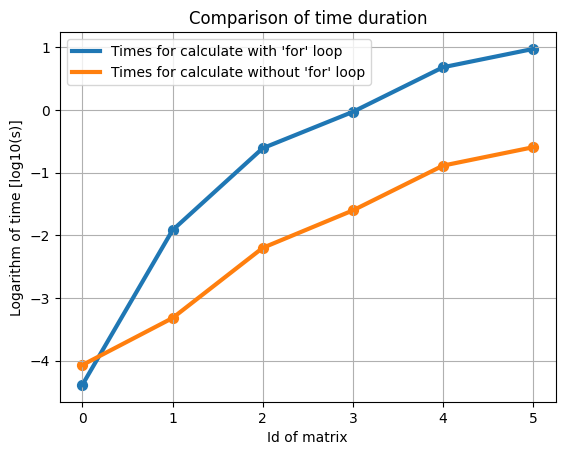

In [22]:
# Sequence of matrices' shape: (3x3), (100x100), (500x500), (1000x1000), (5000x1000), (10000x1000)  
x = [each for each in range(6)]

ytime_old = [np.log10(each[0]) for each in time_old] 
ytime_new = [np.log10(each[0]) for each in time_new]

print(ytime_old)

plt.plot(x, ytime_old, linewidth=3, label="Times for calculate with 'for' loop")
plt.scatter(x, ytime_old, s=50)

plt.plot(x, ytime_new, linewidth=3, label="Times for calculate without 'for' loop")
plt.scatter(x, ytime_new, s=50)

plt.grid()
plt.xlabel("Id of matrix")
plt.ylabel("Logarithm of time [log10(s)]")
plt.title("Comparison of time duration")
plt.legend()
plt.show()

#### 2. (5 pkt) Wykonaj podzadania zdefiniowane w punktach a), b), c) i d) z wykorzystaniem bibliotek `pandas`, `matplotlib` i `sklearn`

a) **(0.25 pkt)** Używając biblioteki `sklearn` i poniższej definicji wczytaj zbiór danych `boston house-prices dataset` i przekształć go do postaci `DataFrame` z biblioteki `pandas`. Dodatkowo wyświetl 15 pierwszych rekordów.

```python
from sklearn.datasets import load_boston
dataset = load_boston()
```

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

dataset = load_boston()

labels = dataset.feature_names
labels = np.append(labels,'target')
data = np.c_[dataset.data, dataset.target]
boston_df = pd.DataFrame(data,columns=labels)
boston_df.head(15)

/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


b) **(0.75 pkt)** Używając funkcji `apply` utwórz kolumnę $\text{HIGH_TAX}$, która sprawdza czy dla danego rekordu stawka podatkowa (kolumna $\text{TAX}$)  jest większa od mediany stawki podatkowej wszystkich rekordów



In [24]:
med = boston_df["TAX"].median()
boston_df["HIGH_TAX"] = boston_df["TAX"].apply(lambda x: 1.0 if x > med else 0.0)

In [25]:
boston_df["HIGH_TAX"].describe()

count    506.000000
mean       0.494071
std        0.500460
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: HIGH_TAX, dtype: float64

c) **(1.5 pkt)** Pogrupuj rekordy wg. kolumny $\text{HIGH_TAX}$ i wybierz 4 cechy ze zbioru danych w których najbardziej widać różnicę dla grup $\text{HIGH_TAX}$



In [26]:
boston_df.groupby(["HIGH_TAX"]).mean()
# Selected features: CRIM, RAD, ZN, INDUS

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
HIGH_TAX,,,,,,,,,,,,,,
0.0,0.249547,15.966797,6.826953,0.078125,0.486659,6.476523,56.979687,4.740493,4.367188,273.519531,17.853125,387.590586,9.64418,25.980078
1.0,7.058236,6.650000,15.550040,0.060000,0.624364,6.088140,80.448400,2.826902,14.856000,546.188000,19.072400,325.015480,15.73416,19.002800


d) **(2.5 pkt)** Dla wybranych cech w punkcie `c)` porównaj wartości tych cech na wykresach. Dobierz odpowiedni typ wykresu (słupkowy, kołowy, liniowy, histogram). Wybór uzasadnij. Wykresy mają być umiejscowione w jednym wykresie z subplotem składającym się z 2 kolumn i dwóch rzędów. Wykresy powinny posiadać etykiety osi X i Y oraz legendę.


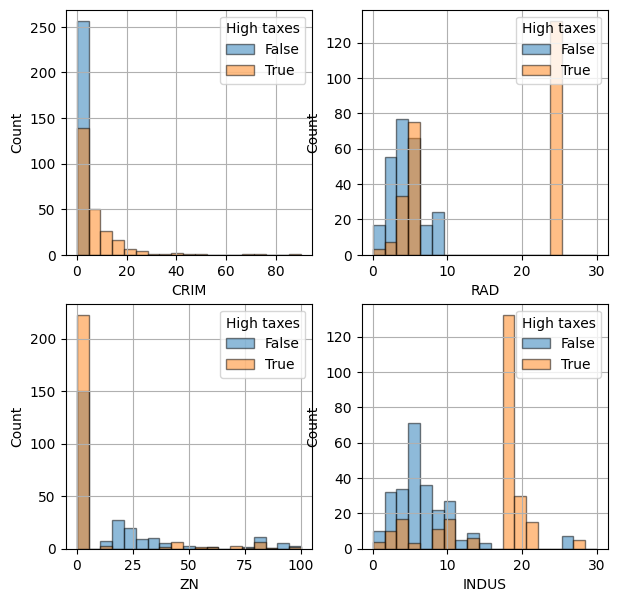

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

with_high_tax = boston_df[boston_df["HIGH_TAX"]==1]
without_high_tax = boston_df[boston_df["HIGH_TAX"]==0]

amount = 20
fir_bin_size = np.linspace(0, 90, amount)
sec_bin_size = np.linspace(0, 30, amount)
thr_bin_size = np.linspace(0, 100, amount)
fth_bin_size = np.linspace(0, 30, amount)

bin_sizes = [fir_bin_size, sec_bin_size, thr_bin_size, fth_bin_size]
params = ["CRIM", "RAD", "ZN", "INDUS"]
axes = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]

for idx, param in enumerate(params):
    axes[idx].hist(without_high_tax[param].tolist(), bins=bin_sizes[idx], alpha = 0.5, edgecolor = "black",label="False")
    axes[idx].hist(with_high_tax[param].tolist(), bins=bin_sizes[idx], alpha = 0.5, edgecolor = "black",label="True")
    axes[idx].legend(title="High taxes",loc="upper right")
    axes[idx].set_xlabel(param)
    axes[idx].set_ylabel("Count")
    axes[idx].grid()

plt.show()

#### [OPCJONALNE] 3. (1.5 pkt) Zapoznaj się z biblioteką [seaborn](https://seaborn.pydata.org/index.html) i zmień wykresy z punktu 2 d) na używające tej biblioteki

In [96]:
import seaborn as sns

In [97]:
boston_df = boston_df.astype(float)
boston_df["HIGH_TAX"].describe()

count    506.000000
mean       0.494071
std        0.500460
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: HIGH_TAX, dtype: float64

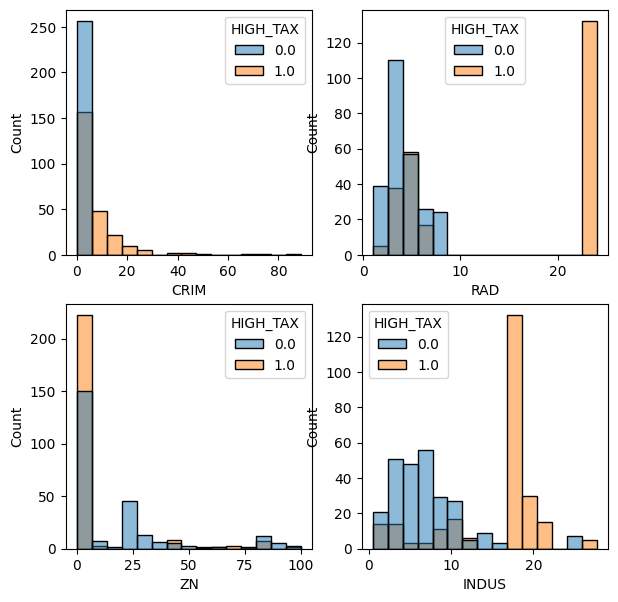

In [98]:
cols_to_plot = ["CRIM", "RAD", "ZN", "INDUS", "HIGH_TAX"]
params = ["CRIM", "RAD", "ZN", "INDUS"]

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=boston_df, bins=15, x="CRIM",hue="HIGH_TAX", ax=axs[0, 0])
sns.histplot(data=boston_df, bins=15, x="RAD", hue="HIGH_TAX", ax=axs[0, 1])
sns.histplot(data=boston_df, bins=15, x="ZN", hue="HIGH_TAX",  ax=axs[1, 0])
sns.histplot(data=boston_df, bins=15, x="INDUS", hue="HIGH_TAX", ax=axs[1, 1])
plt.show()
